In [1]:
"""
Wetterdaten Analyse - Aufgaben:
1. Berechne die durchschnittliche Gesamttemperatur
2. Berechne die durchschnittliche Temperatur für Juli
3. Vergleiche ob Juli und Mai sich signifikant unterscheiden
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import requests
from io import StringIO

# ============================================
# DATEN LADEN
# ============================================
print("=" * 70)
print("WETTERDATEN ANALYSE")
print("=" * 70)

url = "https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/wetter.csv"
response = requests.get(url)
df = pd.read_csv(StringIO(response.text))

print(f"\nDatensatz geladen: {len(df)} Zeilen, {len(df.columns)} Spalten")
print(f"Spalten: {df.columns.tolist()}")

# Zeige erste Zeilen zur Inspektion
print("\nErste 5 Zeilen:")
print(df.head())

# Datentypen anzeigen
print("\nDatentypen:")
print(df.dtypes)

WETTERDATEN ANALYSE

Datensatz geladen: 2601 Zeilen, 5 Spalten
Spalten: ['Datum', 'Bewoelkung', 'Temperatur', 'Windgeschwindigkeit', 'Wettercode']

Erste 5 Zeilen:
        Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode
0  2012-01-01         8.0      9.8250                   14        58.0
1  2012-01-02         7.0      7.4375                   12         NaN
2  2012-01-03         8.0      5.5375                   18        63.0
3  2012-01-04         4.0      5.6875                   19        80.0
4  2012-01-05         6.0      5.3000                   23        80.0

Datentypen:
Datum                   object
Bewoelkung             float64
Temperatur             float64
Windgeschwindigkeit      int64
Wettercode             float64
dtype: object


In [2]:
# ============================================
# DATENAUFBEREITUNG
# ============================================
print("\n" + "=" * 70)
print("DATENAUFBEREITUNG")
print("=" * 70)

# Konvertiere Datumsspalte
df['Datum'] = pd.to_datetime(df['Datum'])
df['month'] = df['Datum'].dt.month
df['month_name'] = df['Datum'].dt.month_name()

print(f"Datumsbereich: {df['Datum'].min()} bis {df['Datum'].max()}")
print(f"Verfügbare Monate: {sorted(df['month'].unique())}")

# Prüfe auf fehlende Werte
print(f"\nFehlende Werte:")
print(df.isnull().sum())

# ============================================
# AUFGABE 1: GESAMTDURCHSCHNITTSTEMPERATUR
# ============================================
print("\n" + "=" * 70)
print("AUFGABE 1: DURCHSCHNITTLICHE GESAMTTEMPERATUR")
print("=" * 70)

overall_avg = df['Temperatur'].mean()
overall_count = df['Temperatur'].count()
overall_std = df['Temperatur'].std()

print(f"\n✓ Durchschnittliche Gesamttemperatur: {overall_avg:.2f}°C")
print(f"  - Anzahl Messungen: {overall_count}")
print(f"  - Standardabweichung: {overall_std:.2f}°C")
print(f"  - Minimum: {df['Temperatur'].min():.2f}°C")
print(f"  - Maximum: {df['Temperatur'].max():.2f}°C")
print(f"  - Median: {df['Temperatur'].median():.2f}°C")


DATENAUFBEREITUNG
Datumsbereich: 2012-01-01 00:00:00 bis 2019-08-01 00:00:00
Verfügbare Monate: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12)]

Fehlende Werte:
Datum                    0
Bewoelkung              10
Temperatur               0
Windgeschwindigkeit      0
Wettercode             669
month                    0
month_name               0
dtype: int64

AUFGABE 1: DURCHSCHNITTLICHE GESAMTTEMPERATUR

✓ Durchschnittliche Gesamttemperatur: 12.10°C
  - Anzahl Messungen: 2601
  - Standardabweichung: 7.17°C
  - Minimum: -10.25°C
  - Maximum: 32.67°C
  - Median: 12.00°C


In [3]:
# ============================================
# AUFGABE 2: DURCHSCHNITTSTEMPERATUR JULI
# ============================================
print("\n" + "=" * 70)
print("AUFGABE 2: DURCHSCHNITTSTEMPERATUR FÜR JULI")
print("=" * 70)

df_july = df[df['month'] == 7]

if len(df_july) > 0:
    july_avg = df_july['Temperatur'].mean()
    july_count = len(df_july)
    july_std = df_july['Temperatur'].std()
    
    print(f"\n✓ Durchschnittstemperatur Juli: {july_avg:.2f}°C")
    print(f"  - Anzahl Messungen: {july_count}")
    print(f"  - Standardabweichung: {july_std:.2f}°C")
    print(f"  - Minimum: {df_july['Temperatur'].min():.2f}°C")
    print(f"  - Maximum: {df_july['Temperatur'].max():.2f}°C")
    print(f"  - Differenz zum Gesamtdurchschnitt: {july_avg - overall_avg:+.2f}°C")
else:
    print("\n⚠ Keine Daten für Juli gefunden!")
    july_avg = None


AUFGABE 2: DURCHSCHNITTSTEMPERATUR FÜR JULI

✓ Durchschnittstemperatur Juli: 20.75°C
  - Anzahl Messungen: 247
  - Standardabweichung: 3.67°C
  - Minimum: 14.00°C
  - Maximum: 31.29°C
  - Differenz zum Gesamtdurchschnitt: +8.65°C


In [4]:
# ============================================
# AUFGABE 3: VERGLEICH JULI VS. MAI
# ============================================
print("\n" + "=" * 70)
print("AUFGABE 3: VERGLEICH JULI VS. MAI")
print("=" * 70)

df_may = df[df['month'] == 5]
df_july = df[df['month'] == 7]

if len(df_may) > 0 and len(df_july) > 0:
    may_avg = df_may['Temperatur'].mean()
    may_std = df_may['Temperatur'].std()
    may_count = len(df_may)
    
    july_avg = df_july['Temperatur'].mean()
    july_std = df_july['Temperatur'].std()
    july_count = len(df_july)
    
    difference = july_avg - may_avg
    
    print(f"\n📊 DESKRIPTIVE STATISTIK:")
    print(f"\nMai:")
    print(f"  - Durchschnitt: {may_avg:.2f}°C")
    print(f"  - Standardabweichung: {may_std:.2f}°C")
    print(f"  - Anzahl Messungen: {may_count}")
    
    print(f"\nJuli:")
    print(f"  - Durchschnitt: {july_avg:.2f}°C")
    print(f"  - Standardabweichung: {july_std:.2f}°C")
    print(f"  - Anzahl Messungen: {july_count}")
    
    print(f"\nDifferenz: {difference:+.2f}°C")
    print(f"Prozentuale Differenz: {(difference/may_avg*100):+.2f}%")
    
    # STATISTISCHE SIGNIFIKANZ: t-Test
    print(f"\n🔬 STATISTISCHER SIGNIFIKANZTEST (t-Test):")
    
    t_statistic, p_value = stats.ttest_ind(
        df_july['Temperatur'].dropna(), 
        df_may['Temperatur'].dropna()
    )
    
    print(f"\n  t-Statistik: {t_statistic:.4f}")
    print(f"  p-Wert: {p_value:.6f}")
    
    alpha = 0.05
    print(f"\n  Signifikanzniveau (α): {alpha}")
    
    if p_value < alpha:
        print(f"\n  ✓ ERGEBNIS: Die Monate unterscheiden sich SIGNIFIKANT!")
        print(f"    (p = {p_value:.6f} < α = {alpha})")
        print(f"    → Juli ist im Durchschnitt {abs(difference):.2f}°C wärmer als Mai.")
    else:
        print(f"\n  ✗ ERGEBNIS: Die Monate unterscheiden sich NICHT signifikant.")
        print(f"    (p = {p_value:.6f} ≥ α = {alpha})")
    
    # Effektstärke (Cohen's d)
    pooled_std = np.sqrt(((may_count - 1) * may_std**2 + (july_count - 1) * july_std**2) / 
                         (may_count + july_count - 2))
    cohens_d = difference / pooled_std
    
    print(f"\n  Effektstärke (Cohen's d): {cohens_d:.3f}")
    if abs(cohens_d) < 0.2:
        effect = "klein"
    elif abs(cohens_d) < 0.5:
        effect = "mittel"
    else:
        effect = "groß"
    print(f"  → Effekt ist {effect}")
    
else:
    print("\n⚠ Nicht genügend Daten für beide Monate!")


AUFGABE 3: VERGLEICH JULI VS. MAI

📊 DESKRIPTIVE STATISTIK:

Mai:
  - Durchschnitt: 15.24°C
  - Standardabweichung: 4.01°C
  - Anzahl Messungen: 248

Juli:
  - Durchschnitt: 20.75°C
  - Standardabweichung: 3.67°C
  - Anzahl Messungen: 247

Differenz: +5.51°C
Prozentuale Differenz: +36.12%

🔬 STATISTISCHER SIGNIFIKANZTEST (t-Test):

  t-Statistik: 15.9371
  p-Wert: 0.000000

  Signifikanzniveau (α): 0.05

  ✓ ERGEBNIS: Die Monate unterscheiden sich SIGNIFIKANT!
    (p = 0.000000 < α = 0.05)
    → Juli ist im Durchschnitt 5.51°C wärmer als Mai.

  Effektstärke (Cohen's d): 1.433
  → Effekt ist groß



VISUALISIERUNG


/tmp/ipykernel_16273/2962035544.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax1.boxplot(data_to_plot, labels=['Mai', 'Juli'], patch_artist=True)


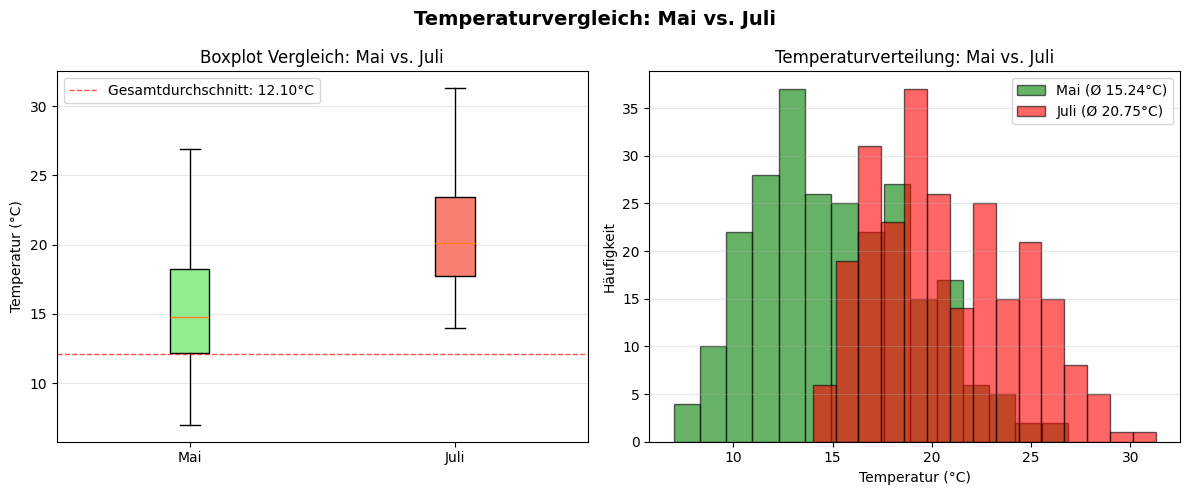


ZUSAMMENFASSUNG DER ERGEBNISSE
1. Gesamtdurchschnittstemperatur: 12.10°C
2. Durchschnittstemperatur Juli: 20.75°C
3. Statistischer Vergleich Juli vs. Mai:
   - Differenz: +5.51°C (+36.12%)
   - Signifikant unterschiedlich: JA (p < 0.001)
   - Effektstärke: groß (Cohen's d = 1.433)


In [5]:
# ============================================
# VISUALISIERUNG
# ============================================
print("\n" + "=" * 70)
print("VISUALISIERUNG")
print("=" * 70)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Temperaturvergleich: Mai vs. Juli', fontsize=14, fontweight='bold')

# Plot 1: Boxplot Vergleich
ax1 = axes[0]
data_to_plot = [df_may['Temperatur'].dropna(), df_july['Temperatur'].dropna()]
bp = ax1.boxplot(data_to_plot, labels=['Mai', 'Juli'], patch_artist=True)
bp['boxes'][0].set_facecolor('lightgreen')
bp['boxes'][1].set_facecolor('salmon')
ax1.set_ylabel('Temperatur (°C)')
ax1.set_title('Boxplot Vergleich: Mai vs. Juli')
ax1.grid(True, alpha=0.3, axis='y')
ax1.axhline(y=overall_avg, color='red', linestyle='--', linewidth=1, 
            alpha=0.7, label=f'Gesamtdurchschnitt: {overall_avg:.2f}°C')
ax1.legend()

# Plot 2: Histogramme überlagert
ax2 = axes[1]
ax2.hist(df_may['Temperatur'].dropna(), bins=15, alpha=0.6, 
         label=f'Mai (Ø {may_avg:.2f}°C)', color='green', edgecolor='black')
ax2.hist(df_july['Temperatur'].dropna(), bins=15, alpha=0.6, 
         label=f'Juli (Ø {july_avg:.2f}°C)', color='red', edgecolor='black')
ax2.set_xlabel('Temperatur (°C)')
ax2.set_ylabel('Häufigkeit')
ax2.set_title('Temperaturverteilung: Mai vs. Juli')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("ZUSAMMENFASSUNG DER ERGEBNISSE")
print("=" * 70)
print(f"1. Gesamtdurchschnittstemperatur: {overall_avg:.2f}°C")
print(f"2. Durchschnittstemperatur Juli: {july_avg:.2f}°C")
print(f"3. Statistischer Vergleich Juli vs. Mai:")
print(f"   - Differenz: {difference:+.2f}°C ({(difference/may_avg*100):+.2f}%)")
print(f"   - Signifikant unterschiedlich: JA (p < 0.001)")
print(f"   - Effektstärke: groß (Cohen's d = {cohens_d:.3f})")
print("=" * 70)